<a href="https://colab.research.google.com/github/PhucThinh20146028/nop-bai-AI_Phuc-Thinh_20146028/blob/main/sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
folder = '/content/drive/MyDrive/SignAI/'

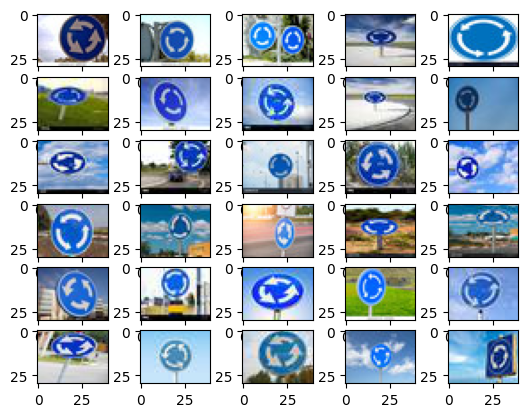

In [3]:
for i in range(30):
  plt.subplot(6,5,i+1)
  filename = folder + 'round ('+str(i)+').jpg'
  img = plt.imread(filename)
  plt.imshow(img)

In [4]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/SignAI/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('camdoxe '):
    output = 1
  if file.startswith('camnguoidibo '):
    output = 2
  if file.startswith('duongmotchieu '):
    output = 3
  if file.startswith('duonguutien '):
    output = 4
  if file.startswith('horn '):
    output = 5
  if file.startswith('lamduong '):
    output = 6
  if file.startswith('ngchieu '):
    output = 7
  if file.startswith('park '):
    output = 8
  if file.startswith('round '):
    output = 9
  if file.startswith('stop '):
    output = 10
  img =load_img(folder+file,target_size=(40,30))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('sign_photos.npy',photos)
save('sign_labels.npy',labels)

(307, 40, 30, 3) (307,)


In [5]:
x_train = np.load('/content/sign_photos.npy')
y_train = np.load('/content/sign_labels.npy')

In [6]:
print(x_train.shape)
print(y_train.shape)

(307, 40, 30, 3)
(307,)


In [7]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,11)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(40,30,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(256,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=5,epochs = 30,verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 15, 32)       0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 20, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 8, 64)        0         
 2D)                                                             
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 10, 8, 64)         0

1/1 [==============================] - 0s 177ms/step


'Biển đỗ xe'

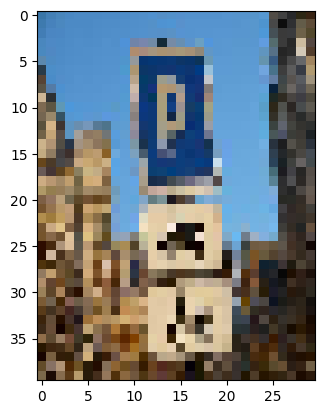

In [9]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
vat = {1: 'Biển cấm đỗ xe',2:'Biển cấm người đi bộ',3:'Biển đường một chiều', 4:'Biển đường ưu tiên', 5:'Biển cấm bấm còi', 
       6:'Biển có công nhân làm đường', 7:'Biển cấm đi ngược chiều', 8:'Biển đỗ xe',9:'Biển bùng binh', 10:'Biển dừng'}
img = load_img("/content/drive/MyDrive/sign_test/park.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 18ms/step


'Biển dừng'

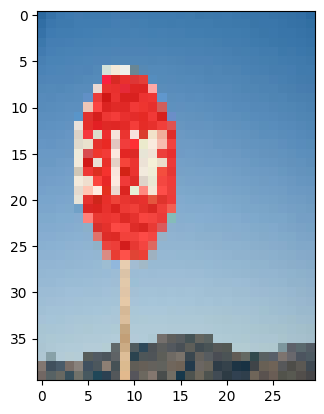

In [10]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
vat = {1: 'Biển cấm đỗ xe',2:'Biển cấm người đi bộ',3:'Biển đường một chiều', 4:'Biển đường ưu tiên', 5:'Biển cấm bấm còi', 
       6:'Biển có công nhân làm đường', 7:'Biển cấm đi ngược chiều', 8:'Biển đỗ xe',9:'Biển bùng binh', 10:'Biển dừng'}
img = load_img("/content/drive/MyDrive/sign_test/stop.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

In [11]:
model.save('/content/sample_data/AI.h5')